<a href="https://colab.research.google.com/github/kujoki/Advanced-Machine-Learning-Masters-2022-/blob/main/Event_s_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
import numpy as np

In [ ]:
sns.set(rc={'figure.figsize': (9,6)})

In [ ]:
data = pd.read_csv('event_data_train.csv')

In [ ]:
submissions_data = pd.read_csv('submissions_data_train.csv')

In [ ]:
submissions_data.head(10)

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
5,31976,1434348188,correct,15853
6,31976,1478852055,correct,15853
7,31977,1434347371,correct,15853
8,31978,1434349981,correct,15853
9,31979,1434446091,correct,15853


In [ ]:
data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [ ]:
data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [ ]:
data.action.value_counts()

viewed             1830830
discovered          689495
passed              650331
started_attempt     310047
Name: action, dtype: int64

In [ ]:
data.data = pd.to_datetime(data.timestamp)

/tmp/ipykernel_10844/3180669661.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.data = pd.to_datetime(data.timestamp)


In [ ]:
data['data'] = pd.to_datetime(data.timestamp, unit = 's')

In [ ]:
submissions_data['data'] = pd.to_datetime(submissions_data.timestamp, unit = 's')

In [ ]:
data.head(10)

,step_id,timestamp,action,user_id,data
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
5,32811,1434340895,passed,17632,2015-06-15 04:01:35
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19
9,32929,1434340944,passed,17632,2015-06-15 04:02:24


In [ ]:
submissions_data.head(10)

,step_id,timestamp,submission_status,user_id,data
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03
5,31976,1434348188,correct,15853,2015-06-15 06:03:08
6,31976,1478852055,correct,15853,2016-11-11 08:14:15
7,31977,1434347371,correct,15853,2015-06-15 05:49:31
8,31978,1434349981,correct,15853,2015-06-15 06:33:01
9,31979,1434446091,correct,15853,2015-06-16 09:14:51


In [ ]:
data.data.max()

Timestamp('1970-01-01 00:00:01.526772811')

In [ ]:
data['data'].min()

Timestamp('2015-06-15 04:00:48')

In [ ]:
data['day'] = data['data'].dt.date

In [ ]:
submissions_data['day'] = submissions_data['data'].dt.date

In [ ]:
data.head(10)

,step_id,timestamp,action,user_id,data,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15


In [ ]:
submissions_data.head(10)

,step_id,timestamp,submission_status,user_id,data,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15
6,31976,1478852055,correct,15853,2016-11-11 08:14:15,2016-11-11
7,31977,1434347371,correct,15853,2015-06-15 05:49:31,2015-06-15
8,31978,1434349981,correct,15853,2015-06-15 06:33:01,2015-06-15
9,31979,1434446091,correct,15853,2015-06-16 09:14:51,2015-06-16


In [ ]:
data.groupby('day') \
.user_id.nunique()


day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
             ... 
2018-05-15    145
2018-05-16    155
2018-05-17    165
2018-05-18    126
2018-05-19    131
Name: user_id, Length: 1070, dtype: int64

<AxesSubplot:xlabel='day'>

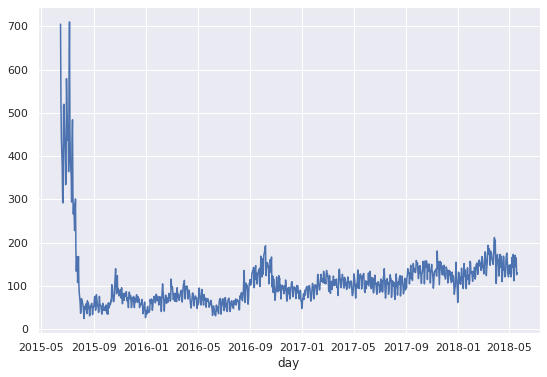

In [ ]:
data.groupby('day') \
.user_id.nunique().plot()


<AxesSubplot:>

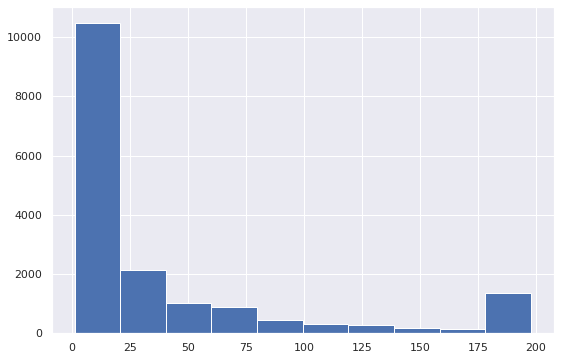

In [ ]:
data.loc[data['action'] == 'passed'].groupby('user_id', as_index = False) \
.agg({'step_id':'count'}).rename(columns ={'step_id':'passed_steps'}).passed_steps.hist()


In [ ]:
data.loc[data['action'] == 'passed']

,step_id,timestamp,action,user_id,data,day
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15
12,32814,1434340950,passed,17632,2015-06-15 04:02:30,2015-06-15
16,32812,1434341039,passed,17632,2015-06-15 04:03:59,2015-06-15
...,...,...,...,...,...,...
3480679,32179,1526771246,passed,19410,2018-05-19 23:07:26,2018-05-19
3480680,32182,1526771250,passed,19410,2018-05-19 23:07:30,2018-05-19
3480692,33373,1526772469,passed,11677,2018-05-19 23:27:49,2018-05-19
3480696,33375,1526772685,passed,11677,2018-05-19 23:31:25,2018-05-19


In [ ]:
data.loc[data['action'] == 'passed'].groupby('user_id', as_index = False) \
.agg({'step_id':'count'}).rename(columns ={'step_id':'passed_steps'}).passed_steps.min()

1

In [ ]:
data.pivot_table(index = 'user_id', columns = 'action', values = 'step_id', aggfunc = 'count', fill_value = 0)

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
...,...,...,...,...
26790,8,8,1,9
26793,1,0,1,1
26794,69,69,34,180


In [ ]:
data.pivot_table(index = 'user_id', columns = 'action', values = 'step_id', aggfunc = 'count', fill_value = 0).reset_index()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


<AxesSubplot:>

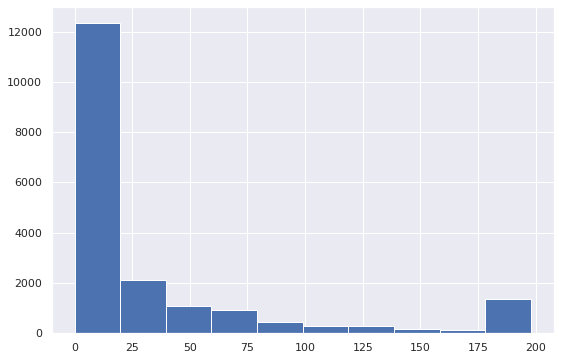

In [ ]:
data.pivot_table(index = 'user_id', columns = 'action', \
                 values = 'step_id', aggfunc = 'count', fill_value = 0).reset_index().passed.hist()

In [ ]:
user_events_data = data.pivot_table(index = 'user_id', columns = 'action', \
                 values = 'step_id', aggfunc = 'count', fill_value = 0).reset_index()

In [ ]:
user_events_data.head(10)

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
5,8,109,84,37,156
6,9,3,3,0,4
7,11,1,0,1,1
8,14,4,3,1,9
9,16,196,196,108,651


In [ ]:
users_scores = submissions_data.pivot_table(index = 'user_id', columns = 'submission_status', \
                 values = 'step_id', aggfunc = 'count', fill_value = 0).reset_index()

In [ ]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [ ]:
events_data = data

In [ ]:
gap_data = events_data[['user_id','day','timestamp']].drop_duplicates(subset = ['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [ ]:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [ ]:
gap_data = gap_data / (24*60*60)

<AxesSubplot:>

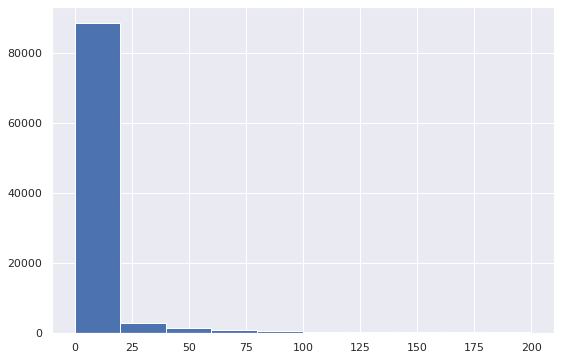

In [ ]:
gap_data[gap_data < 200].hist()

In [ ]:
gap_data.quantile(0.95)

59.760440972222156

In [ ]:
events_data

,step_id,timestamp,action,user_id,data,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


ПОИСК АВТОРА КУРСА 

In [ ]:
author_id = data.pivot_table(index = 'user_id', columns = 'action', values = 'step_id', aggfunc = 'count', fill_value = 0).reset_index()

In [ ]:
author_id['all_acts'] = author_id['discovered']+ author_id['passed']+ author_id['started_attempt']+ author_id['viewed']

In [ ]:
author_id.all_acts.min()

1

In [ ]:
author_id[author_id.all_acts == 1]

action,user_id,discovered,passed,started_attempt,viewed,all_acts
6334,8773,0,0,1,0,1
8225,11437,0,0,1,0,1
19026,26502,0,0,1,0,1


In [ ]:
author_id[author_id.user_id == 1046]

action,user_id,discovered,passed,started_attempt,viewed,all_acts
781,1046,128,124,721,8122,9095


In [ ]:
users_scores.correct.max()

421

In [ ]:
users_scores[users_scores.correct == 421]

submission_status,user_id,correct,wrong
439,1046,421,513


In [ ]:
now = 1526772811

In [ ]:
drop_out = 2592000

In [ ]:
events_data.tail()

,step_id,timestamp,action,user_id,data,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [ ]:
users_data = events_data.groupby('user_id',as_index = False).agg({'timestamp':'max'}).rename(columns = {'timestamp':'last_timestamp'})

In [ ]:
users_data['is_gone'] = (now - users_data.last_timestamp) > drop_out

In [ ]:
users_data

,user_id,last_timestamp,is_gone
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [ ]:
users_days = events_data.groupby('user_id').day.nunique()

In [ ]:
users_days.to_frame().reset_index()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [ ]:
users_days = users_days.to_frame().reset_index()

In [ ]:
users_data.merge(users_scores, how = 'outer')

,user_id,last_timestamp,is_gone,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,NaN,NaN
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [ ]:
users_data = users_data.merge(users_scores, how = 'outer')

In [ ]:
users_data = users_data.fillna(0)

In [ ]:
users_data.head(10)

,user_id,last_timestamp,is_gone,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [ ]:
users_data = users_data.merge(user_events_data, how = 'outer')

In [ ]:
users_data

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [ ]:
 users_data = users_data.merge(users_days, how = 'outer')

In [ ]:
 users_data

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [ ]:
users_data['passed_corse'] = users_data.passed > 170

In [ ]:
 users_data

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [ ]:
 users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [ ]:
100 * 1425/ 19234

7.408755329104711